In [28]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [85]:
def get_interpolated_data(data):
    min_date = pd.to_datetime(data['ds'].min())
    max_date = pd.to_datetime(data['ds'].max())
    date_range = pd.date_range(min_date, max_date, freq='D')
    date_range_df = pd.DataFrame(date_range, columns=['ds'])
    interpolated_df = pd.merge(date_range_df, data, on='ds', how='left')
    for col in data.columns:
        if col != 'ds':
            interpolated_df[col] = interpolated_df[col].interpolate(method='linear')
    return interpolated_df

In [61]:
def make_prediction(train_data, periods):
    model = Prophet(daily_seasonality=True)
    model.fit(train_data)
    future_dates = model.make_future_dataframe(periods=periods, freq='D', include_history=False)
    return model.predict(future_dates)


In [62]:
def evaluate_prediction(prediction, test_data):
    prediction = prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    comparison = pd.merge(test_decisions_per_day, prediction, on='ds', how='inner')


    mae = mean_absolute_error(comparison['y_true'], comparison['yhat'])
    mse = mean_squared_error(comparison['y_true'], comparison['yhat'])

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    plt.figure(figsize=(12, 6))
    plt.plot(comparison['ds'], comparison['y_true'], label='Actual', marker='o')
    plt.plot(comparison['ds'], comparison['yhat'], label='Predicted', marker='x')
    plt.fill_between(comparison['ds'], comparison['yhat_lower'], comparison['yhat_upper'], color='k', alpha=0.1)
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Number of Decisions')
    plt.title('Actual vs. Predicted Decisions')
    plt.show()

In [81]:
def predict_post_per_day(interpolate_data = False):
    decisions = ['All', 'Interview', 'Accepted', 'Rejected']
    for decision in decisions:
        print("Predict {} post numbers per day.".format(decision))

        train_data = None
        test_data = None
        if decision == 'All':
            train_data = data[data['Decision Year'] < 2019]
            test_data = data[data['Decision Year'] >= 2019]
        else:
            train_data = data[(data['Decision Year'] < 2019) & (data['Decision'] == decision)]
            test_data = data[(data['Decision Year'] >= 2019) & (data['Decision'] == decision)]

        # Make prediction
        train_decisions_per_day = train_data.groupby(['Decision Date']).size().reset_index(name='Count')
        train_decisions_per_day.columns = ['ds', 'y']
        if interpolate_data:
            train_decisions_per_day = get_interpolated_data(train_decisions_per_day)
        pred = make_prediction(train_decisions_per_day, 365 * 3)
        # Evaluate prediction
        test_decisions_per_day = test_data.groupby(['Decision Date']).size().reset_index(name='Count')
        test_decisions_per_day.columns = ['ds', 'y_true']
        if interpolate_data:
            test_decisions_per_day = get_interpolated_data(test_decisions_per_day)
        evaluate_prediction(pred, test_decisions_per_day)

Predict All post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 24.69
Mean Squared Error (MSE): 719.69


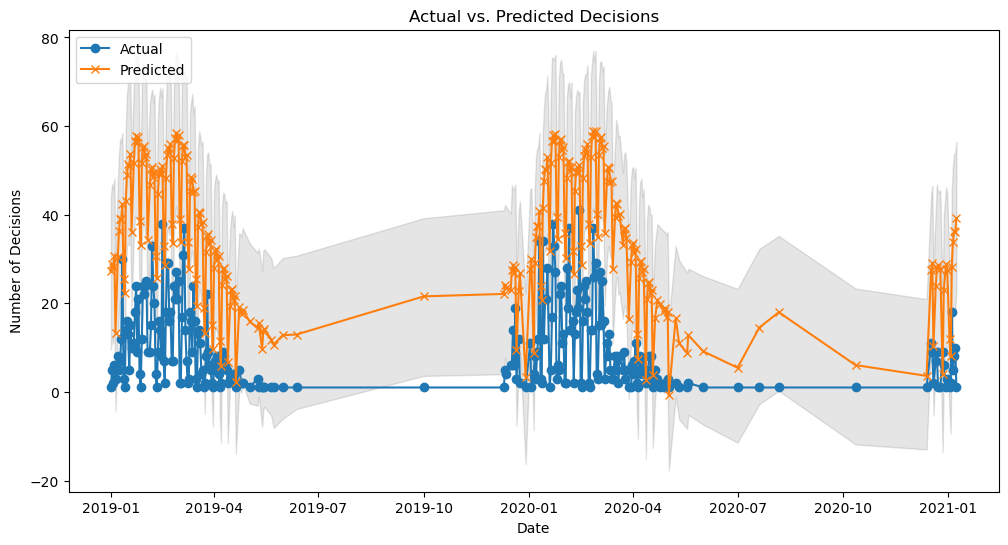

Predict Interview post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 8.30
Mean Squared Error (MSE): 112.51


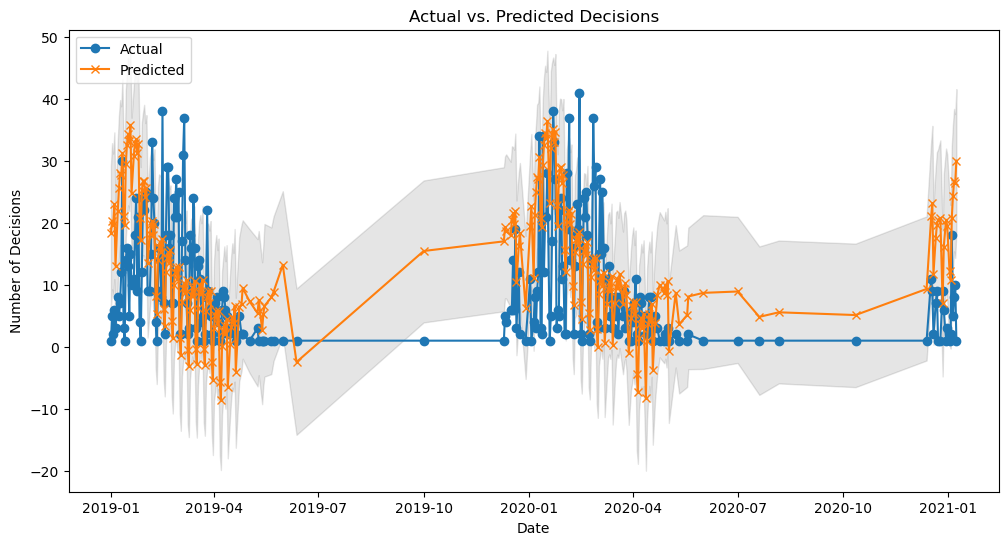

Predict Accepted post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 5.52
Mean Squared Error (MSE): 61.14


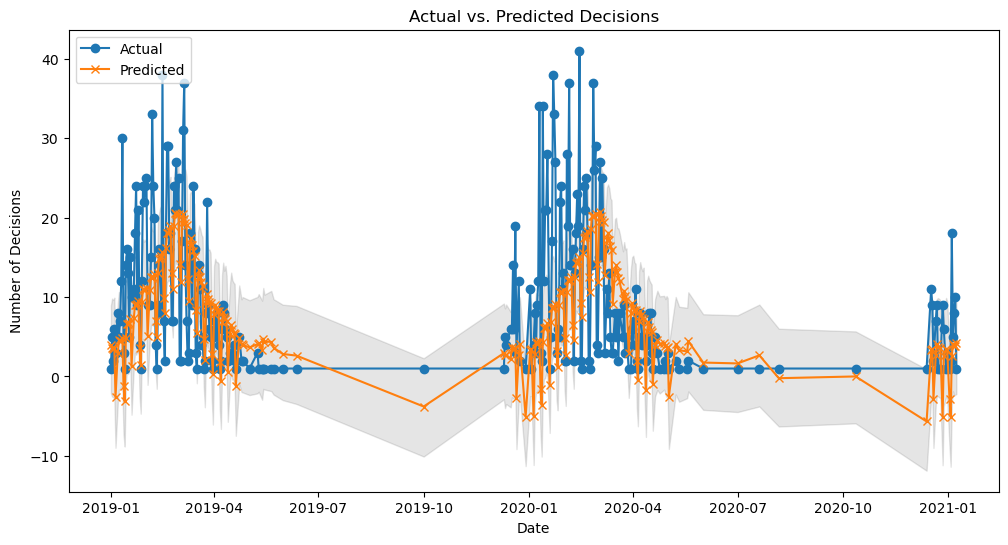

Predict Rejected post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 5.02
Mean Squared Error (MSE): 51.46


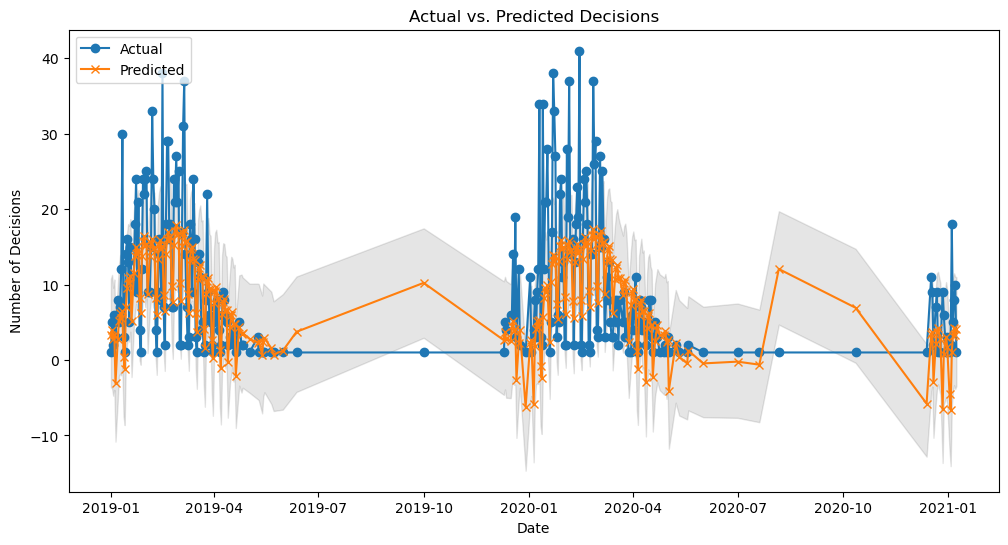

In [78]:
predict_post_per_day(interpolate_data = False)

Predict All post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 14.29
Mean Squared Error (MSE): 264.39


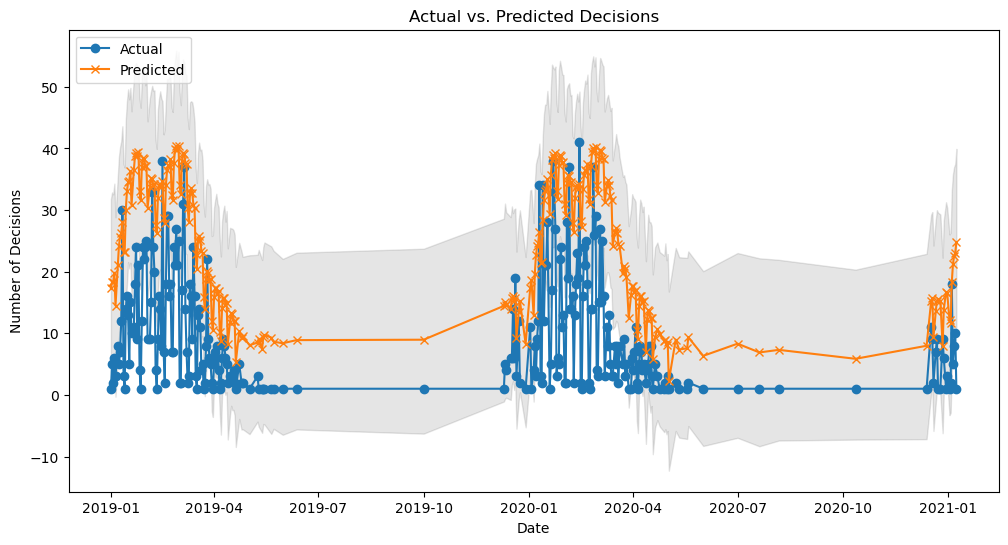

Predict Interview post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 6.85
Mean Squared Error (MSE): 92.14


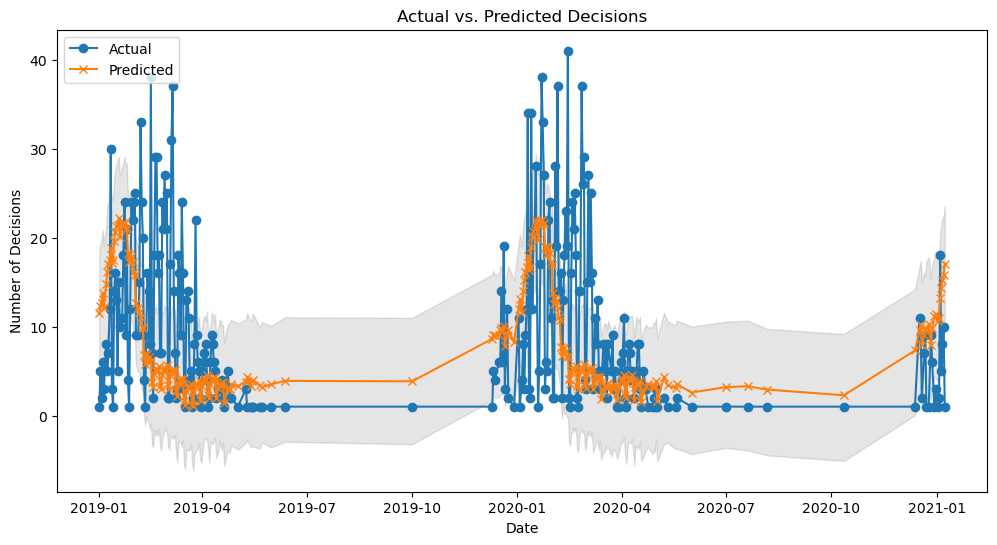

Predict Accepted post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 6.06
Mean Squared Error (MSE): 83.39


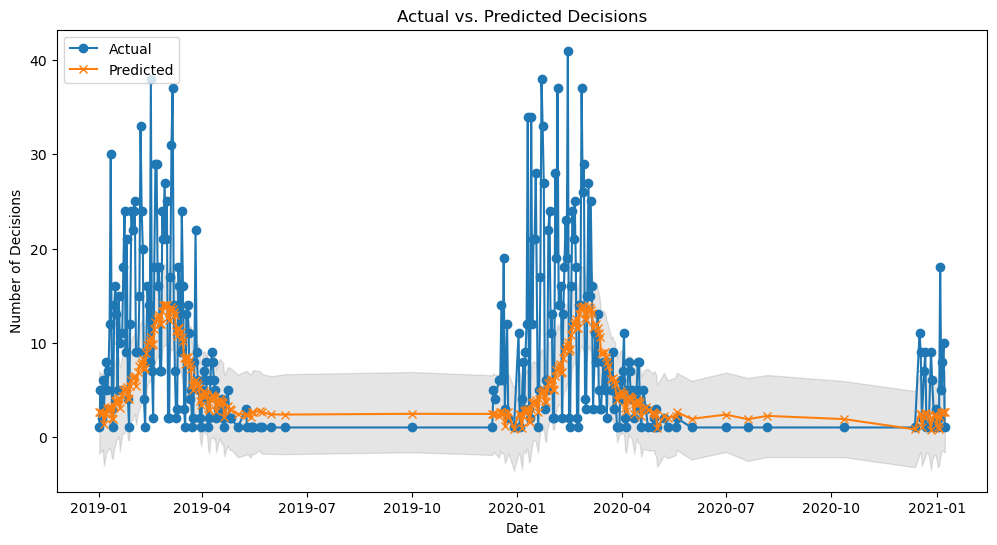

Predict Rejected post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 5.48
Mean Squared Error (MSE): 66.05


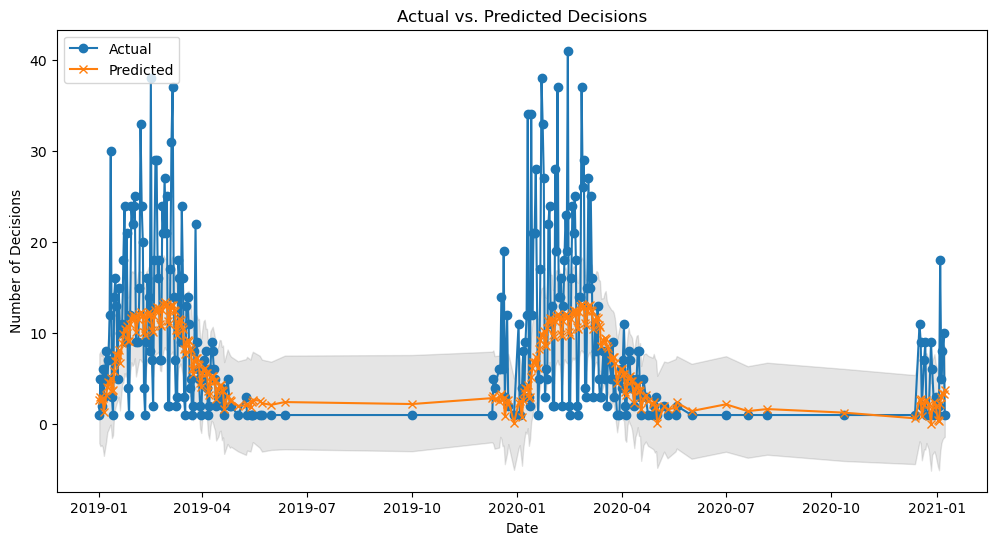

In [87]:
predict_post_per_day(interpolate_data = True)